In [1]:
#matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format
from sklearn import preprocessing

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [4]:
sn_names=glob.glob("./supcommwebv/*.dat")
print(len(sn_names))

95


In [5]:
sn_names[0]

'./supcommwebv/SN2001V.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
ll = []

In [9]:
new_names = []

In [10]:
sort = []

In [11]:
for k in range(0,len(sn_names)):
    
    file = open(sn_names[k])
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)
    
    xtemp = xtemp/max(xtemp)
        
    if max(xtemp) < 10:
        
        new_names.append(sn_names[k])
        ll.append(max(xtemp))
        z = np.reshape(xtemp, (601, 61))



        zz = []
        xx = []
        yy = []

        for i in range(0,len(y)):

            for j in range(0,len(x)):

                #if -9.5 < x[j] < 51:

                    #if 2999 < y[i] < 6999:

                zz.append(z[i][j])
                xx.append(x[j])
                yy.append(y[i])


        sort.append(sn_names[k][:-4])

        X.append(np.array(zz))


In [12]:
save_path = '/home/joao/Documents/'
name_of_file = 'trainingnamespca'
completeName = os.path.join(save_path, name_of_file+".dat")

f = open(completeName, 'w')

for i in range(0, len(new_names)):
    
    f.write(new_names[i]+'\n')
    
f.close()

In [13]:
ll

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [14]:
len(X)

95

In [15]:
np.sqrt(np.var(ll))

0.0

In [16]:
hist = []
for i in range(0,len(ll)):
    
    if ll[i] < 100000000000:
    
        hist.append(ll[i])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(hist, bins=30)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

<IPython.core.display.Javascript object>

In [18]:
ll[7]

1.0

In [19]:
ll

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [20]:
x[10]

0.0

In [21]:
len(X)

95

In [22]:
N = 3

In [23]:
from numpy.random import RandomState

In [24]:
rng = RandomState(0)

pca = PCA(0.25, whiten=True)
pca.fit(X)

PCA(n_components=0.25, whiten=True)

In [25]:
pca.noise_variance_

1.4591632200280733

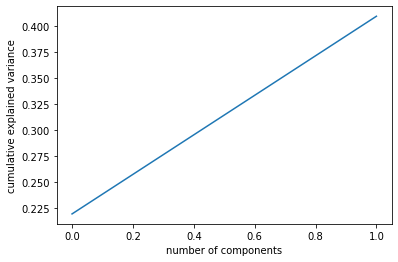

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
range(N)

range(0, 3)

In [28]:
#matplotlib inline
#plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
#plt.xlabel("componentes")
#plt.ylabel("%")
#plt.show()

## Soma das variancias relativas

### primeira

In [29]:
pca.explained_variance_ratio_[0]

0.2193813473897477

### primeira e segunda

In [30]:
#pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

### primeira, segunda e terceira

In [31]:
#pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

In [32]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [33]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [34]:
pca.components_[0]

array([-0.00126606, -0.00145718, -0.00163583, ..., -0.00011713,
       -0.00011283, -0.00010732])

In [35]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [36]:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000, 601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

<IPython.core.display.Javascript object>

# Componentes

In [38]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2), value=0), Output()), _dom_classes=…

# Superficies com N componentes

In [40]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

In [41]:
%matplotlib notebook

fig = plt.figure(figsize=(10,4))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

# Superficies originais

In [42]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

In [43]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [44]:
new_names[0]

'./supcommwebv/SN2001V.dat'

In [45]:
len(pca.components_[0])

36661

In [46]:
projectedt = projected.T

In [47]:
projectedt[0]

array([ 0.00419169,  0.00412352, -0.01391705, -0.01040919,  0.00159969,
        0.01251817,  0.00200683, -0.00165218,  0.02604243,  0.02038561,
       -0.00860941, -0.01253895,  0.02526989,  0.02783981,  0.04564992,
        0.00529817,  0.01498459,  0.0372124 ,  0.01579576, -0.0150264 ,
        0.01871464, -0.00997744,  0.01561898, -0.01515931,  0.00900378,
       -0.00299965,  0.00788471,  0.00483714, -0.00275726, -0.01352453,
        0.01584888,  0.01981844,  0.01860207,  0.00676546,  0.02142479,
        0.05356447,  0.00610596,  0.01647241,  0.02761816, -0.00146124,
        0.02294224, -0.00445345,  0.0292329 , -0.00348723,  0.00323677,
        0.02884183,  0.0407558 ,  0.04123422,  0.02885799, -0.00378968,
        0.00556805,  0.01818778,  0.02632635,  0.0211866 ,  0.00885508,
        0.03052432, -0.00160123, -0.02008923,  0.01555611, -0.00451483,
        0.03049333, -0.00130575, -0.00443912, -0.00834336, -0.02623056,
       -0.02463117,  0.0438749 ,  0.01253809,  0.00071348,  0.04

In [48]:
def cube(x):
    if x >= 0:
        return x**(1/3)
    elif x < 0:
        return -(abs(x)**(1/3))

In [49]:
mean_list = []
sigma_list = []
sk_list = []
for i in range(0, len(projectedt)):
    
    mean = 0
    desv = 0
    sk = 0
    
    
    for k in range(0, len(projectedt[i])):
        
        mean += projectedt[i][k]
        desv += (projectedt[i][k] - np.mean(projectedt[i]))**2
        sk += (projectedt[i][k] - np.mean(projectedt[i]))**3
        
    
    
    mean_list.append(np.mean(projectedt[i]))
    sigma_list.append(np.sqrt(desv/len(projectedt[i])))
    sk_list.append(cube(sk/len(projectedt[i])))
    
    
    

In [50]:
len(sk_list)

36661

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),sk_list,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

<IPython.core.display.Javascript object>

In [52]:
sk_list

[0.01197953483546498,
 0.013212841649273459,
 0.01428305656032804,
 0.015131423182894989,
 0.0157090328589871,
 0.01598207338310714,
 0.015936152584101734,
 0.015578443456281954,
 0.014938310903133932,
 0.01406558539832783,
 0.013026055592104215,
 0.011895746694215658,
 0.010753548014117119,
 0.009673088439035037,
 0.008715715050664229,
 0.007923901783097697,
 0.007317636674572365,
 0.006893152615643611,
 0.006624673522900528,
 0.006468906261642137,
 0.006371322725557972,
 0.006273473432108374,
 0.006120668218050254,
 0.005868853516151549,
 0.005489879841579683,
 0.004974436515813,
 0.00433235815425373,
 0.0035903263715709953,
 0.0027875483563925972,
 0.0019700094780744494,
 0.0011841947520872958,
 0.00046832799982165336,
 -6.794010206530249e-05,
 -0.0005832663680446535,
 -0.0009179748661192076,
 -0.0011152554572231722,
 -0.0011898229239987635,
 -0.0011624770579611683,
 -0.0010578072912457133,
 -0.0009012513833539173,
 -0.0007166754153523519,
 -0.0005244600677784134,
 -0.00034058941490

In [53]:
Z = interp.griddata((xx,yy),mean_list,(B1,B2),method='cubic')

In [54]:
len(Z)

601

In [55]:
teste = Z.transpose()

In [56]:
len(teste)

61

In [57]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [58]:
#exp_z = exp_z/max(exp_z)

In [59]:
save_path = '/home/joao/Documents'

In [60]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [61]:
Z = interp.griddata((xx,yy),sigma_list,(B1,B2),method='cubic')

In [62]:
teste = Z.transpose()

In [63]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [64]:
#exp_z = exp_z/max(exp_z)

In [65]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [66]:
Z = interp.griddata((xx,yy),sk_list,(B1,B2),method='cubic')

In [67]:
teste = Z.transpose()

In [68]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [69]:
#exp_z = exp_z/max(exp_z)

In [70]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [71]:
'''
arrays = [np.array(u) for u in X]

from scipy.stats import skew


med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

teste = Z.transpose()

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2mod.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\narrays = [np.array(u) for u in X]\n\nfrom scipy.stats import skew\n\n\nmed = [np.mean(k) for k in zip(*arrays)]\nvar = [np.var(k) for k in zip(*arrays)]\nskewness = [skew(k) for k in zip(*arrays)]\n\n%matplotlib notebook\n\nZ = interp.griddata((xx,yy),med,(B1,B2),method=\'cubic\')\n#Z = splinemean(B1, B2)\nfig = plt.figure(figsize=(10,6))\nax = axes3d.Axes3D(fig)\nax.plot_wireframe(B1, B2, Z)\nax.plot_surface(B1, B2, Z,alpha=0.4)\n#ax.scatter3D(xx,yy,pca.components_[0], c=\'r\')\n#ax3.set_xlim(3500, 7500)\n#ax3.set_ylim(-10, 50)\n#ax.set_zlim(0, max(pca.components_[1]))\n\nplt.show()\n\nZ = interp.griddata((xx,yy),skewness,(B1,B2),method=\'cubic\')\n\nteste = Z.transpose()\n\nexp_x = []\nexp_y = []\nexp_z = []\n\nfor i in range(0,len(x)):\n    \n    for j in range(0,len(y)):\n        \n        exp_x.append(x[i])\n        exp_y.append(y[j])\n        exp_z.append(teste[i][j])\n\ntable = []\nfor l in range(0,len(exp_x)):\n    table.append((exp_x[l],exp_y[l],exp_z[l]))\n\n\ncompleteName

In [72]:
density = []

In [73]:
for i in range(0,len(X[0])):
    
    count = 0
    
    for j in range(0,len(X)):
        
        if X[j][i] != 0:
            
            count += 1

    density.append(count)

In [74]:
zd = np.reshape(density, (601, 61))

In [75]:
zzd = []
xxd = []
yyd = []

for i in range(0,len(x)):

    for j in range(0,len(y)):

        zzd.append(zd[j][i])
        xxd.append(y[j])
        yyd.append(x[i])


<IPython.core.display.Javascript object>


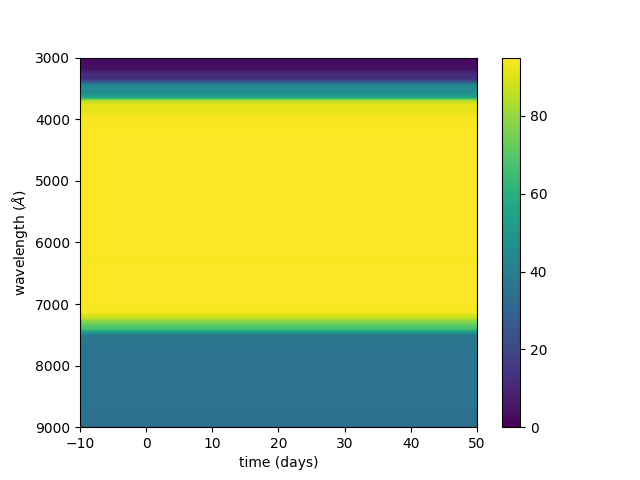

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook
z = np.reshape(zzd, (61, 601)).T
plt.imshow(z, extent=(np.amin(yyd), np.amax(yyd), np.amax(xxd), np.amin(xxd)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,95)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()